In [3]:
import pandas as pd

# CSV 파일 불러오기
file1 = pd.read_csv("test.csv")
file2 = pd.read_csv("train.csv")

# 데이터 확인
file1.head(), file2.head()


(   PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4

In [5]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
file1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
file2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

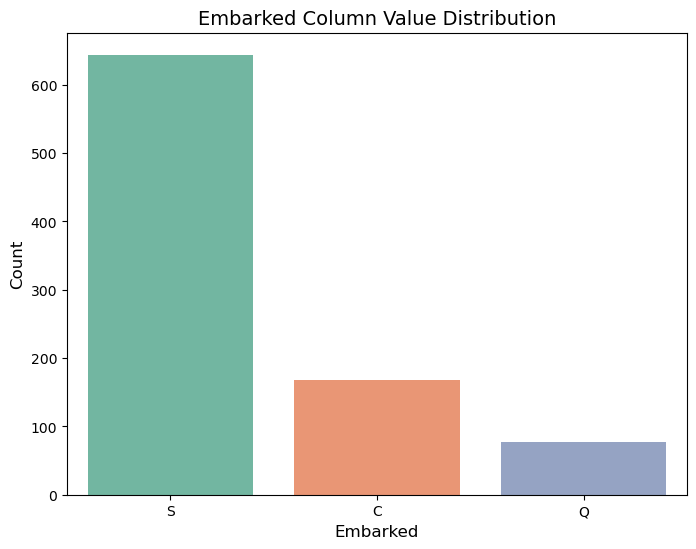

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Embarked 값들의 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=file2, palette='Set2', hue='Embarked', legend=False)

# 그래프 제목 추가
plt.title('Embarked Column Value Distribution', fontsize=14)
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 출력
plt.show()


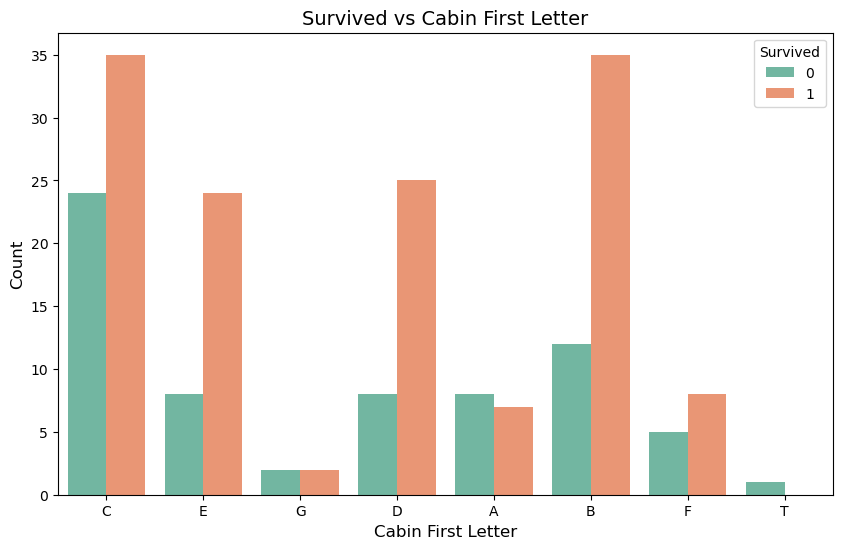

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cabin의 첫 글자만 추출하여 새로운 열 생성
file2['Cabin_first'] = file2['Cabin'].str[0]

# Cabin_first에서 결측치가 아닌 값들만 대상으로 처리
file2.loc[file2['Cabin_first'].notna(), 'Cabin_first'] = file2.loc[file2['Cabin_first'].notna(), 'Cabin_first'].fillna('U')

# Survived와 Cabin_first 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin_first', hue='Survived', data=file2, palette='Set2')

# 그래프 제목 추가
plt.title('Survived vs Cabin First Letter', fontsize=14)
plt.xlabel('Cabin First Letter', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 출력
plt.show()


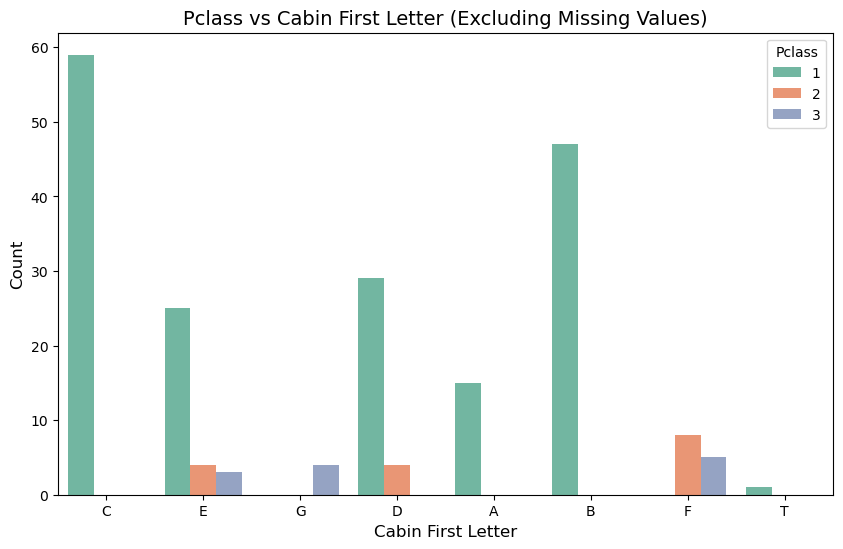

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cabin_first에서 결측치를 제외한 값들만 선택
file2_non_null = file2[file2['Cabin_first'].notna()]

# Survived와 Cabin_first 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin_first', hue='Pclass', data=file2_non_null, palette='Set2')

# 그래프 제목 추가
plt.title('Pclass vs Cabin First Letter (Excluding Missing Values)', fontsize=14)
plt.xlabel('Cabin First Letter', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프 출력
plt.show()


In [28]:
import pandas as pd

# 'Cabin_first' 열에서 첫 글자가 'T'인 행들만 필터링
t_cabin_fare = file2[file2['Cabin_first'] == 'T']['Fare']

# 'T'인 행들의 Fare 값 출력
print(t_cabin_fare)


339    35.5
Name: Fare, dtype: float64


In [30]:
# Fare 열의 평균값 계산
average_fare = file2['Fare'].mean()

# 평균값 출력
print("Fare 평균값:", average_fare)


Fare 평균값: 32.204207968574636


In [32]:
# Cabin_first 열에서 'T'가 포함된 모든 행 필터링
t_cabin_rows = file2[file2['Cabin_first'].str.contains('T', na=False)]

# 'T'가 포함된 행 출력
print(t_cabin_rows)


     PassengerId  Survived  Pclass                          Name   Sex   Age  \
339          340         0       1  Blackwell, Mr. Stephen Weart  male  45.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked Cabin_first  
339      0      0  113784  35.5     T        S           T  


In [34]:
# 'Cabin' 열 삭제
file2 = file2.drop(columns=['Cabin'])

# 삭제된 결과 출력 (선택 사항)
print(file2.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked Cabin_first  
0      0         A/5 21171   7.2500        S         NaN  
1      0          PC 17599  71.2833        C           C  
2      0  STON/O2. 3101282   7.9250        S         NaN  
3      0            113803  53.1000        S           C  
4      0            37345